In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_data = pd.read_csv("/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/data/ifng_true_balanced.csv")
all_data

,Unnamed: 0,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity
0,0,SLMDLLSSL,HLA-A*02:01,0.285714,19.0,5.0,Positive
1,1,AMPFSIFYPM,HLA-A*02:01,0.400000,3.0,1.0,Positive
2,2,SSQVLQQSTY,HLA-A*01:01,0.294118,15.0,4.0,Positive
3,3,QLSEYQTSV,HLA-A*02:01,0.083333,10.0,0.0,Negative
4,4,ILIEGIFFA,HLA-A*02:01,0.933333,13.0,13.0,Positive
...,...,...,...,...,...,...,...
3223,3223,SLLYEYFTV,HLA-A*02:01,0.071429,12.0,0.0,Negative
3224,3224,KTSERSQPR,HLA-A*11:01,0.142857,5.0,0.0,Negative
3225,3225,MIAQYTSAL,HLA-A*02:01,0.400000,3.0,1.0,Positive
3226,3226,NPSKMVYAL,HLA-B*07:02,0.090909,9.0,0.0,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

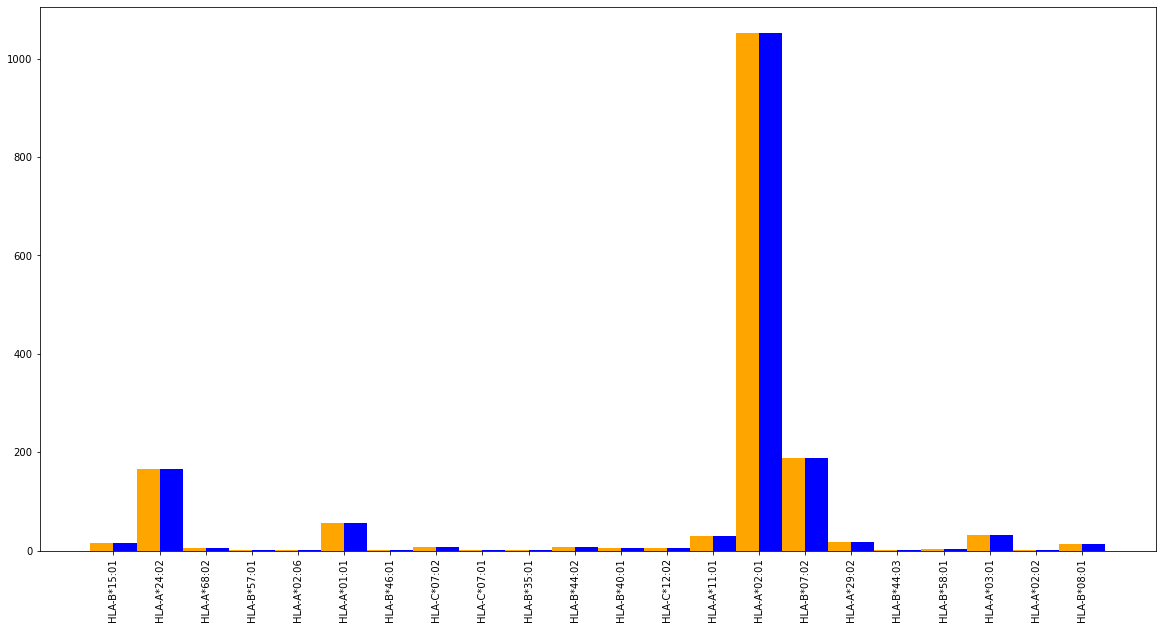

In [4]:
fig = plt.figure(figsize=(20,10))
unique_HLAS = list(set(all_data["HLA_allele"]))

for i,HLA in enumerate(unique_HLAS):
    immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Positive")])
    non_immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Negative")])
    plt.bar(i + 0.25,immunogenic_subjects,color='blue', width=0.5)
    plt.bar(i - 0.25,non_immunogenic_subjects,color='orange', width=0.5)

plt.xticks(np.arange(len(unique_HLAS)),unique_HLAS,rotation=90)
plt.show

In [20]:
# hla_database = pd.read_csv('../data/formatted_hla2paratope_MHC_pseudo.dat', sep=' ',index_col=0)
hla_database = pd.read_csv('../data/MHC_full.dat', sep=' ',index_col=0)
# hla_database = pd.read_csv('../data/MHC_full.dat', sep=' ',index_col=0)
hla_dic = hla_database.to_dict("dict")["pseudo"]

In [21]:
HLA_Alleles_in_data = [hla_dic[x] for x in hla_dic.keys() if x in [x.replace(":","") for x in all_data["HLA_allele"]]]

In [22]:
print("\n".join(HLA_Alleles_in_data))

MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDLQTRNVKAQSQTDRANLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGA-VFAGAVVAAVRWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV
MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASRRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTLQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGA-VITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV
MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQ